In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [111]:
# Units: s/byte
T_copy = 1/(11664.6*1024*1024)

# Function that takes the number of points as argument and returns the time it takes to send AND recv that many
T_MPI_sendrecv = lambda x: max(0.02,0.000001768088*x+0.033992)/1000

In [112]:
# L, R, T, B
halo = [1,1,1,1]

In [178]:
T_1 = np.array([])
T_10 = np.array([])
T_100 = np.array([])
T_1000 = np.array([])
for i in range(100,10000,100):
    num_halo = 8*( (halo[0]+halo[1])*i + (halo[2]+halo[3])*(i-(halo[0]+halo[1])) )
    T_1 = np.append(T_1, [(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_10 = np.append(T_10, [10*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_100 = np.append(T_100, [100*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    T_1000 = np.append(T_1000, [1000*(num_halo*T_copy + T_MPI_sendrecv(num_halo) + num_halo*T_copy)])
    
# THIS IS WRONG!!!
T_10 /= 2.5
T_100 /= 2.5
T_1000 /= 2.5

In [179]:
x_exp = np.array([100, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000])
T_exp_1 = np.array([0.074893, 0.09219, 0.141588, 0.202199, 0.244212, 0.297425, 0.359377, 0.495686, 0.602481])/1000
T_exp_10 = np.array([0.237001, 0.457826, 0.662599, 1.0779, 1.18771, 1.38902, 1.56982, 2.29038, 2.89065])/1000
T_exp_100 = np.array([0.84354, 2.44023, 4.89201, 8.07434, 9.69951, 10.939, 13.0796, 19.0761, 25.4459])/1000
T_exp_1000 = np.array([7.1154, 22.9323, 41.8292, 66.187, 82.4399, 104.859, 128.581, 186.882, 220.381])/1000


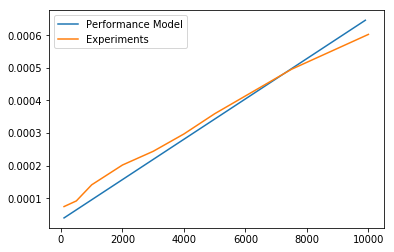

In [183]:
# Change T_1 and T_exp_1 to plot a different number of iterations
line1, = plt.plot(range(100,10000,100),T_1, label="Performance Model")
line2, = plt.plot(x_exp, T_exp_1, label="Experiments")

plt.legend(handles=[line1, line2], loc=2)

plt.show()